In [25]:
import mysql.connector
import pandas as pd


In [26]:
%pip install mysql-connector-python pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
db_config = {
    'host': '192.168.137.4',  # Endereço do MySQL no Docker (localhost ou o IP do contêiner), no caso do meu notebook é 192.168.137.4
    'port': 3306,         # Porta do MySQL
    'user': 'root',       # Usuário do MySQL
    'password': 'rootpassword',  # Senha configurada no Docker
    'database': 'N3'      # Nome do banco de dados
}
connection = mysql.connector.connect(**db_config)
query = "SELECT * FROM consumo_energia_eletrica;"
df = pd.read_sql(query, connection)
connection.close()
print(df)


/tmp/ipykernel_11386/2540814610.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


        ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0      2004    1       TO        Total                  0.0    65876
1      2004    1       BA        Total                  0.0  1444451
2      2004    1       PR        Total                  0.0  1596274
3      2004    1       RS        Total                  0.0  1780912
4      2004    1       GO        Total                  0.0   630624
...     ...  ...      ...          ...                  ...      ...
38875  2023   12       BA  Residencial            5932740.0   718461
38876  2023   12       PA  Residencial            2614106.0   478726
38877  2023   12       AC  Residencial             245699.0    58301
38878  2023   12       RN  Residencial            1390080.0   210119
38879  2023   12       SC  Residencial            2719791.0   655389

[38880 rows x 6 columns]


In [28]:
df.columns.to_list()

['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores', 'consumo']

In [29]:
print(df.head())


    ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0  2004    1       TO        Total                  0.0    65876
1  2004    1       BA        Total                  0.0  1444451
2  2004    1       PR        Total                  0.0  1596274
3  2004    1       RS        Total                  0.0  1780912
4  2004    1       GO        Total                  0.0   630624


In [30]:
print(df.describe())
print(df.isnull().sum())


                ano           mes  numero_consumidores       consumo
count  38880.000000  38880.000000         3.888000e+04  3.888000e+04
mean    2013.500000      6.500000         4.548689e+05  6.117320e+05
std        5.766355      3.452097         1.535840e+06  1.208067e+06
min     2004.000000      1.000000         0.000000e+00  3.540000e+02
25%     2008.750000      3.750000         0.000000e+00  8.547600e+04
50%     2013.500000      6.500000         1.895600e+04  2.210620e+05
75%     2018.250000      9.250000         2.036955e+05  5.966990e+05
max     2023.000000     12.000000         1.920126e+07  1.280974e+07
ano                    0
mes                    0
sigla_uf               0
tipo_consumo           0
numero_consumidores    0
consumo                0
dtype: int64


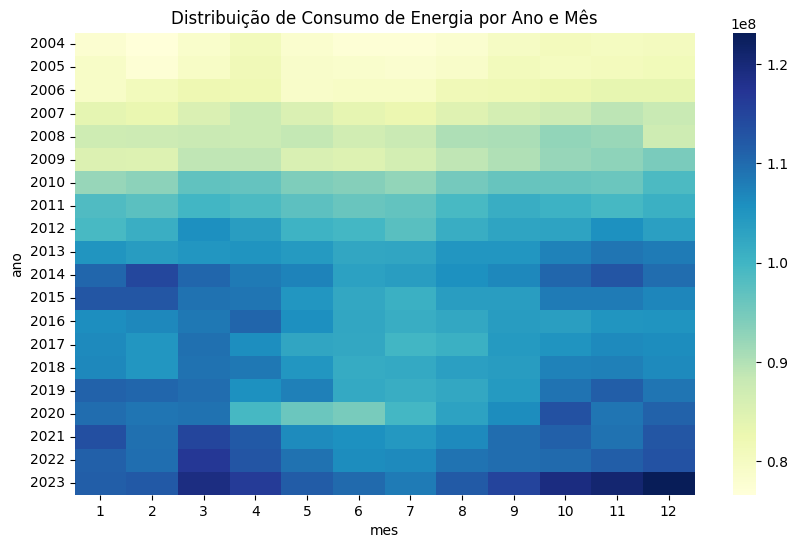

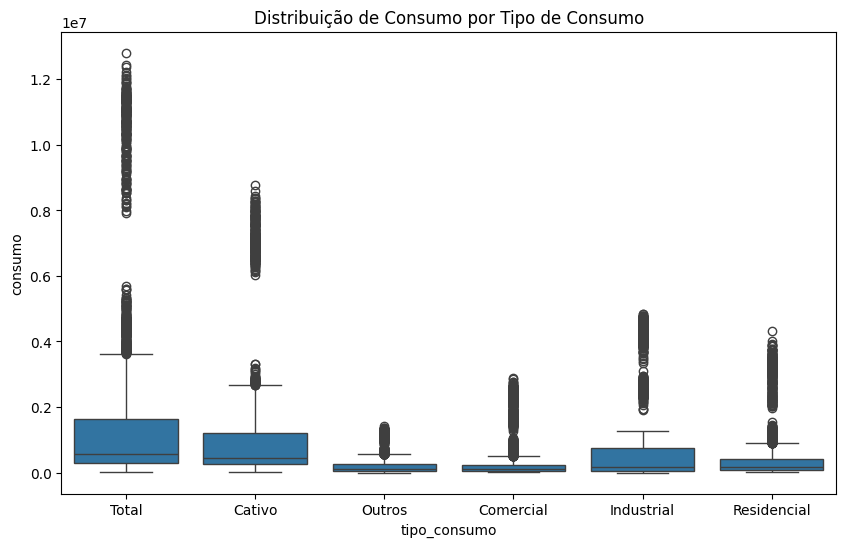

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='consumo', index='ano', columns='mes', aggfunc='sum'), cmap='YlGnBu')
plt.title('Distribuição de Consumo de Energia por Ano e Mês')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_consumo', y='consumo', data=df)
plt.title('Distribuição de Consumo por Tipo de Consumo')
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sigla_uf_encoded'] = label_encoder.fit_transform(df['sigla_uf'])
df['tipo_consumo_encoded'] = label_encoder.fit_transform(df['tipo_consumo'])


In [33]:
X = df[['ano', 'mes', 'sigla_uf_encoded', 'tipo_consumo_encoded', 'numero_consumidores']]
y = df['consumo']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'MSE (Regressão Linear): {mse_lr}')
print(f'R2 (Regressão Linear): {r2_lr}')


MSE (Regressão Linear): 1366973359742.5156
R2 (Regressão Linear): 0.07642377529569588


In [36]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prevendo os valores no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliação do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE (Random Forest): {mse_rf}')
print(f'R2 (Random Forest): {r2_rf}')


MSE (Random Forest): 2071396043.5371516
R2 (Random Forest): 0.9986004905478788
